In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("seaborn")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

# seaborn 의 초기설정
#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

# 로컬에서(Window) 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

C:\Users\crazy\AppData\Local\Temp\ipykernel_26368\854985653.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn")


In [150]:
data = {
    "math" :    [89,76,72,95],
    "english" : [76,75,89,76], 
    "science" : [95,90,79,88],
}

df = pd.DataFrame(data=data, index=["ha","heo","na","park"])
df["math"].std()

10.801234497346433

In [151]:
frac_upper = ((df["math"] - df["math"].mean()) ** 2).sum()
frac_lower = df["math"].__len__() - 1 # 여기에서 n-1을 해줘야 같아진다.

std_calced = np.sqrt(frac_upper/frac_lower)

np.sqrt(frac_upper/frac_lower)

10.801234497346433

In [152]:
df["math"].mean(), df["math"].sum() / df["math"].__len__()

(83.0, 83.0)

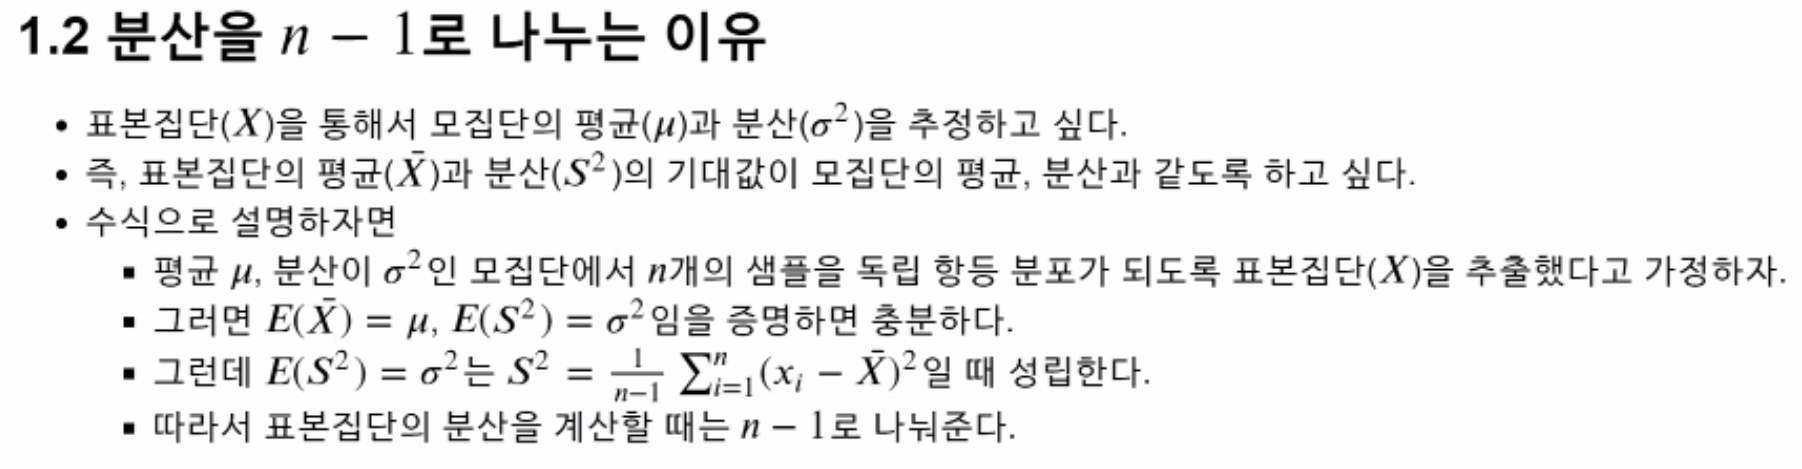

In [153]:
df["math"].std(), np.sqrt(((df["math"] - df["math"].mean()) ** 2).sum() /\
                          (df["math"].__len__()-1))

(10.801234497346433, 10.801234497346433)

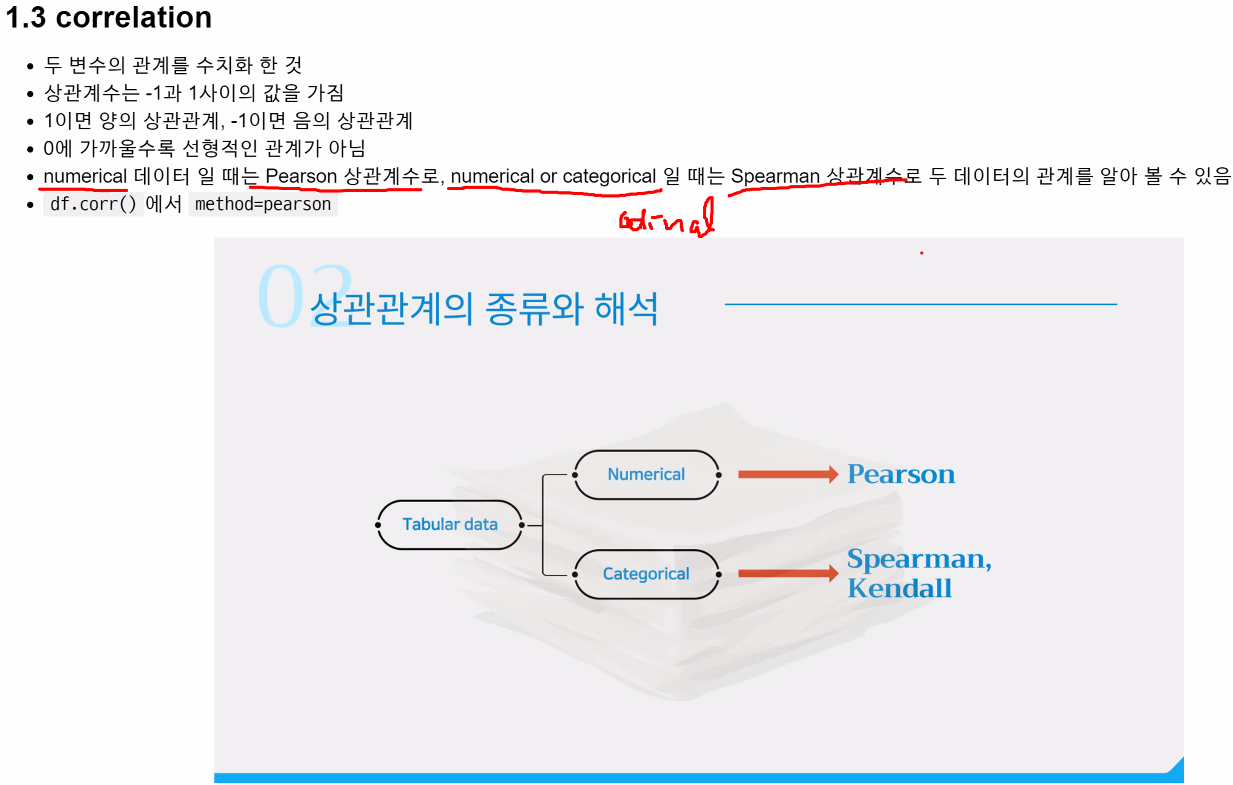

<AxesSubplot: >

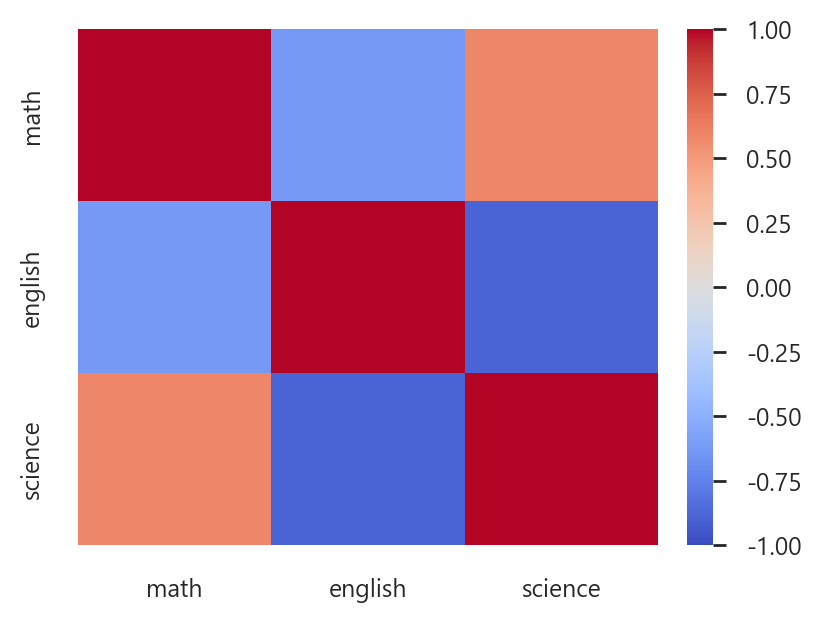

In [154]:
fig, ax = plt.subplots(figsize = (4,3))

sns.heatmap(df.corr(method="pearson"),
            ax=ax,
            vmin=-1,
            vmax=1,
            cmap="coolwarm")

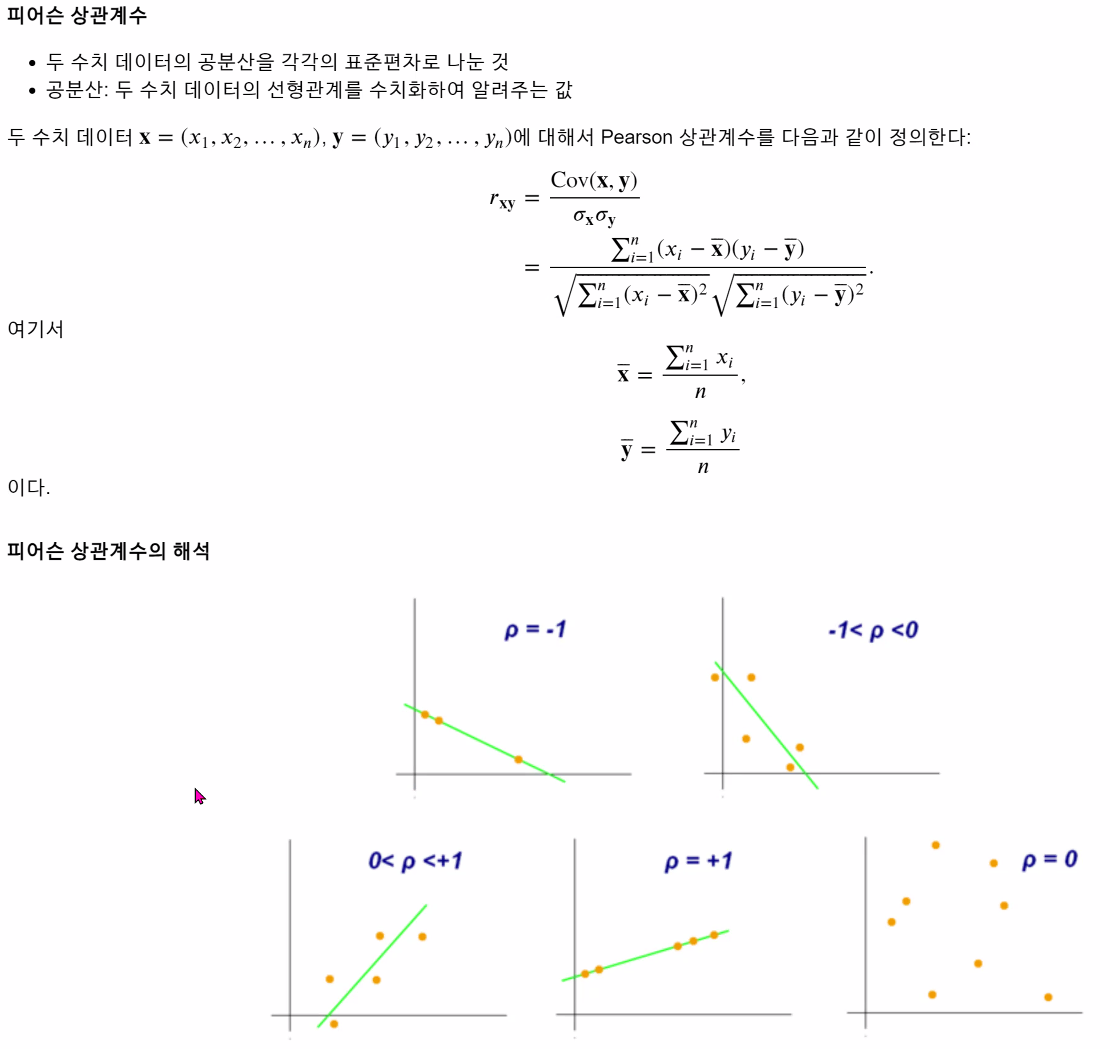

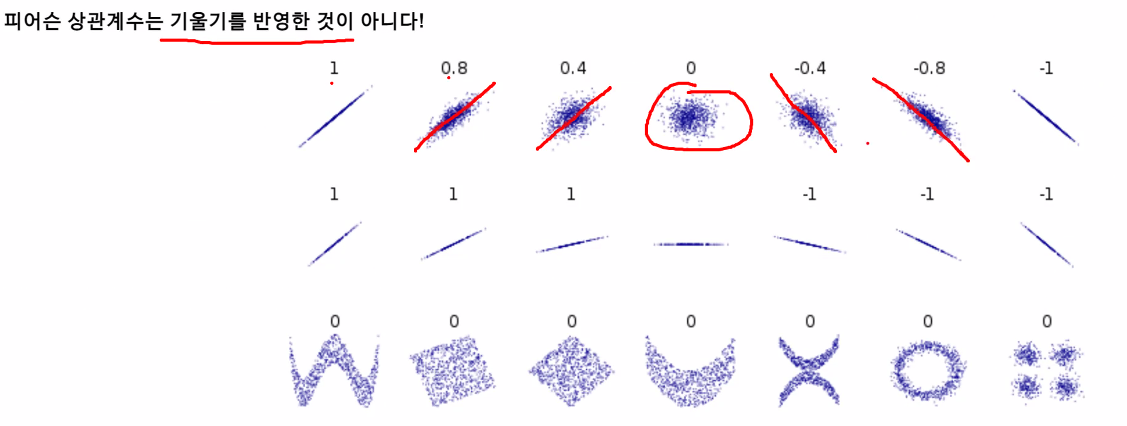

<AxesSubplot: >

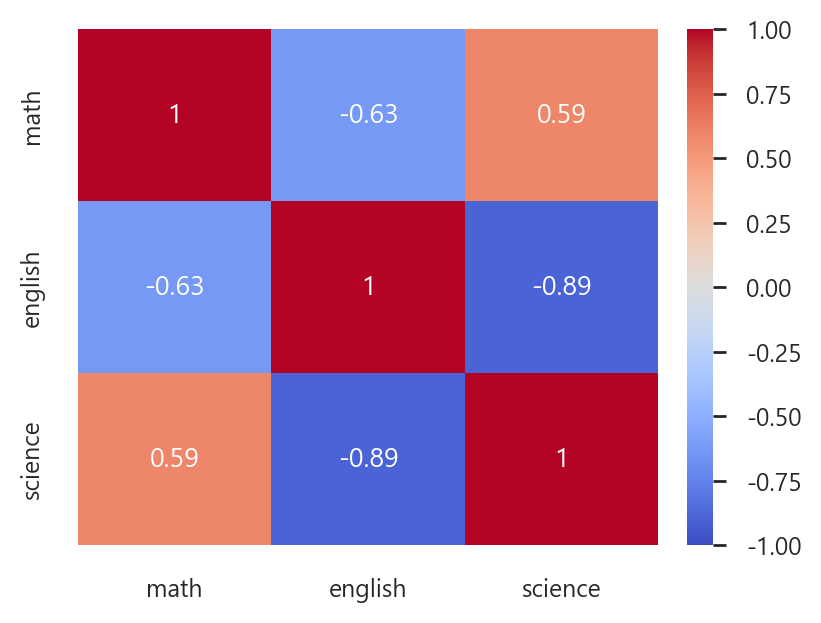

In [155]:
df.corr(method="pearson")
fig, ax = plt.subplots(1,1, figsize=(4,3))
sns.heatmap(data=df.corr(),
            annot=True,
            vmax=1, vmin=-1,
            cmap="coolwarm",
            ax=ax)

In [156]:
df.corr()

,math,english,science
math,1.000000,-0.62799,0.586432
english,-0.627990,1.00000,-0.888060
science,0.586432,-0.88806,1.000000


In [157]:
sigma_1 = df["math"] - df["math"].mean()
sigma_2 = df["science"] - df["science"].mean()

# 공분산
cov_ = (sigma_1 * sigma_2).sum()
frac_udner = np.sqrt((sigma_1 ** 2).sum()) * np.sqrt((sigma_2 ** 2).sum())

pearson_ = cov_ / frac_udner

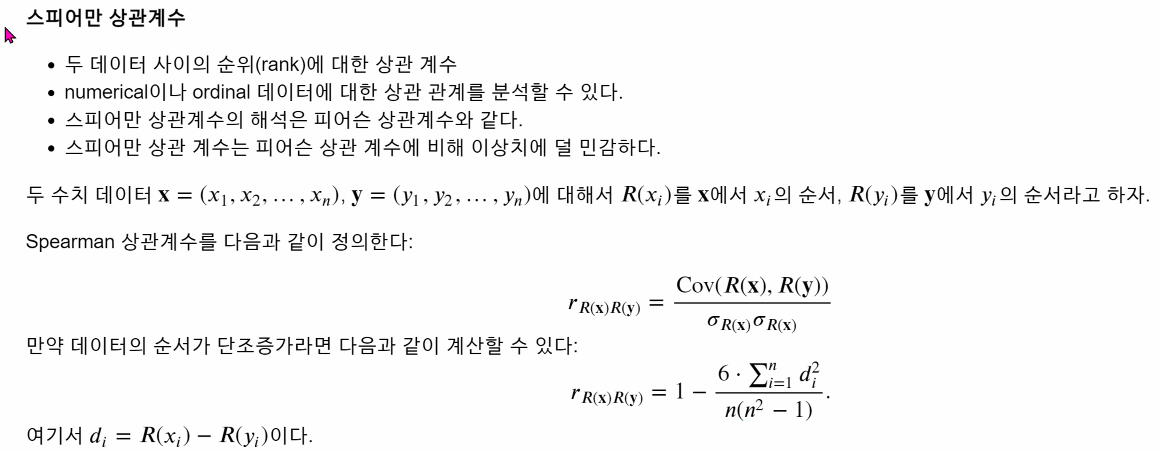

In [158]:
df


,math,english,science
ha,89,76,95
heo,76,75,90
na,72,89,79
park,95,76,88


[(70.0, 100.0), (70.0, 100.0)]

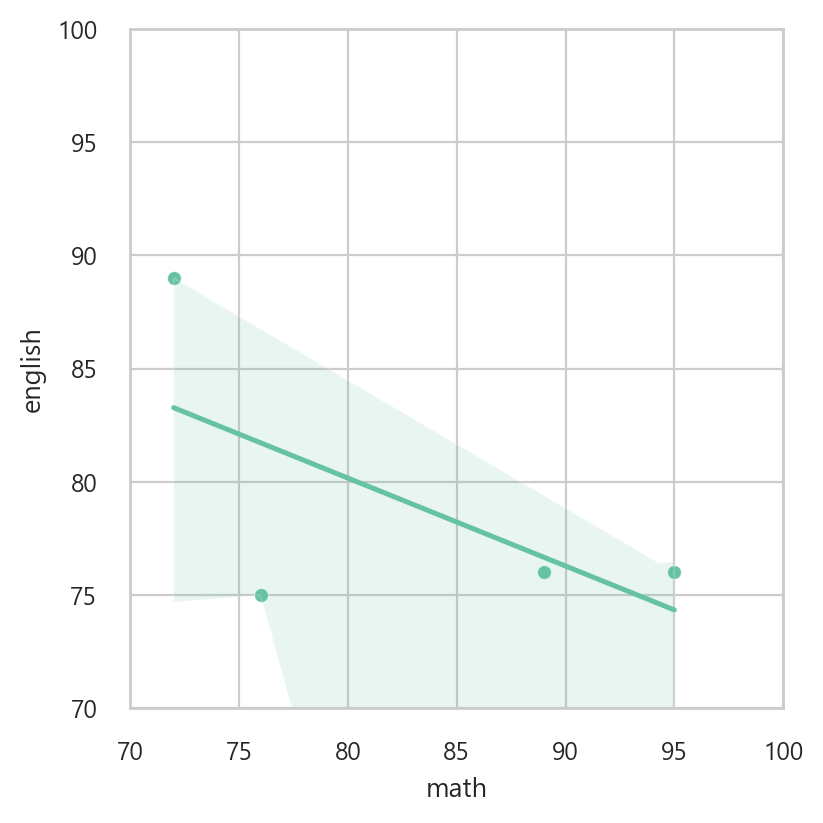

In [159]:

fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.scatterplot(data=df,
                x="math",
                y="english",
                ax=ax)
sns.regplot(data=df,
                x="math",
                y="english",
                ax=ax)
ax.set(xlim=[70,100], ylim=[70,100])

In [160]:
df.corr(method="spearman") # 순위를 가지고 계산

,math,english,science
math,1.000000,-0.316228,0.400000
english,-0.316228,1.000000,-0.632456
science,0.400000,-0.632456,1.000000


- 상관관계가 너무 높으면 편향될 가능성이 크다.

## 데이터 스케일링

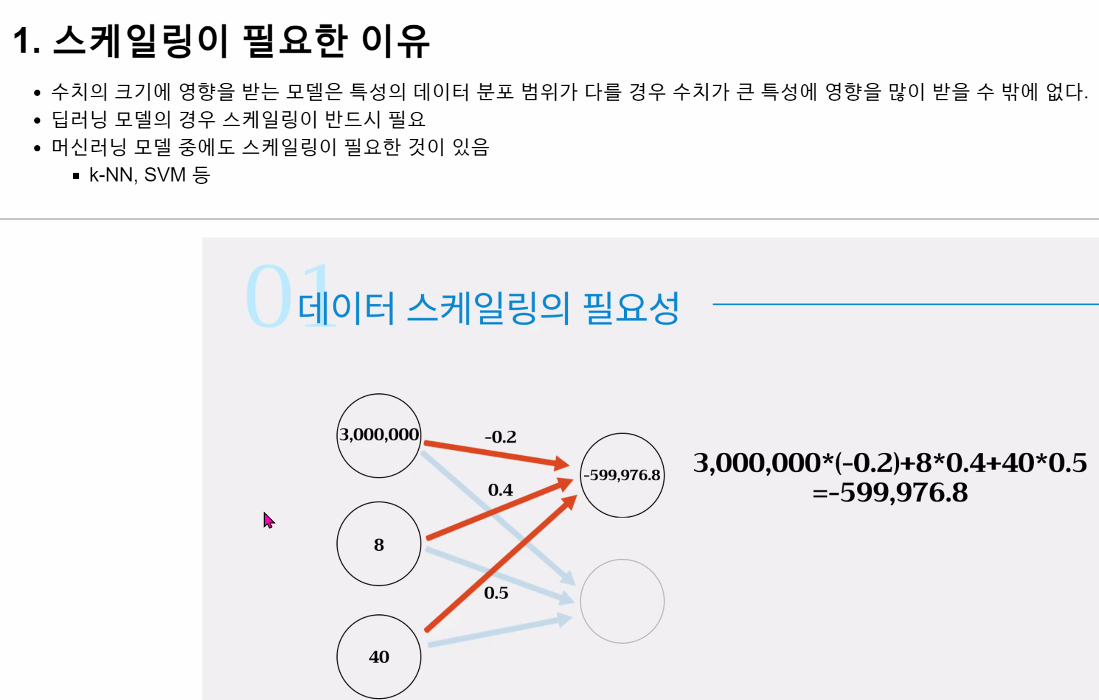

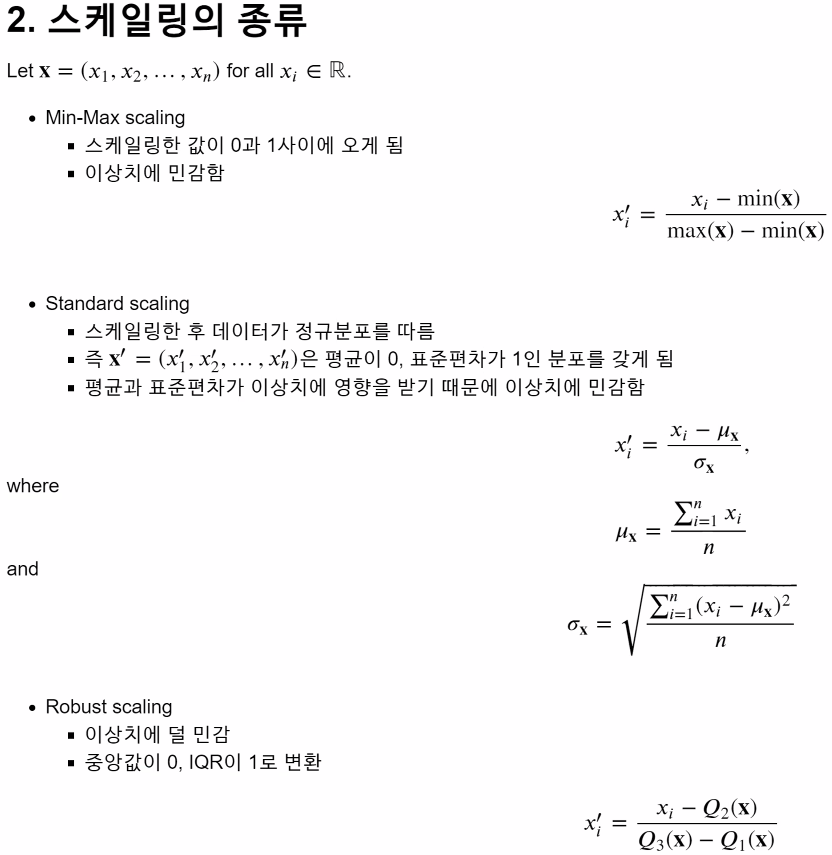

# 스케일링 시각화

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

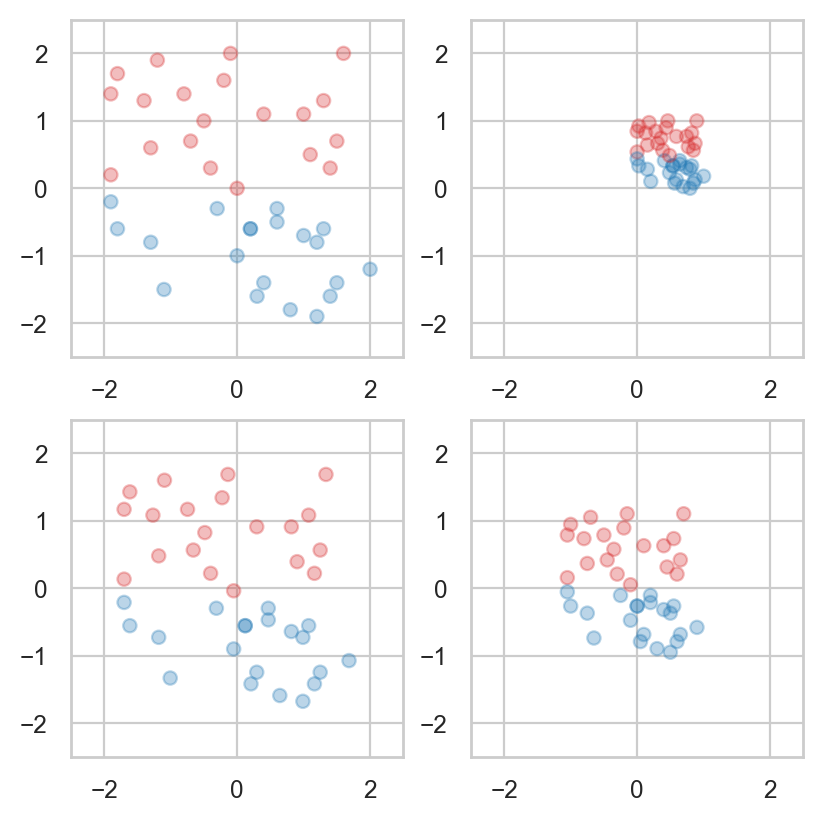

In [162]:
df = pd.read_csv("../datas/240524/scaling_data.csv",
                 encoding="utf-8",
                 index_col=0)

color = df["target"].replace({1: 'tab:blue', 2: 'tab:red'})

model_minmax = MinMaxScaler()
df_model_minmax = model_minmax.fit_transform(df[["x","y"]])

model_std = StandardScaler()
df_model_std = model_std.fit_transform(df[["x","y"]])

model_rob = RobustScaler()
df_model_rob = model_rob.fit_transform(df[["x","y"]])


fig, ax = plt.subplots(2,2,figsize=(4,4))
scaled_data = [df[["x","y"]].values, df_model_minmax, df_model_std,df_model_rob ]
scaled_name = ["origin","min_max","std","rob"]

for data, name, ax in zip(scaled_data, scaled_name, ax.flat):
    ax.scatter(x = data[:,0],
               y = data[:,1],
               alpha=0.3,
               color = color)
    ax.set_xlim(xmin = -2.5, xmax = 2.5)
    ax.set_ylim(ymin = -2.5, ymax = 2.5)


standard~

Robust~

## 차원축소

In [163]:
# 눈으로 보이게끔 차원을 줄이는 과정
# 피쳐가 많을수록 과적합 발생확률이 높아진다.(차원의 저주)
# 데이터 특성을 잘 표현하는 애들을 찾아서 그것만 표현하자

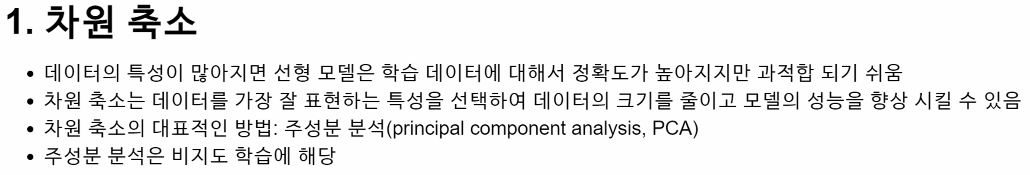

In [164]:
# 주성분 분석 PCA
    # - 이외에   T-SNE
# 등 등
# 이 것은 비지도 학습이다. (알아서 분석해준다.)

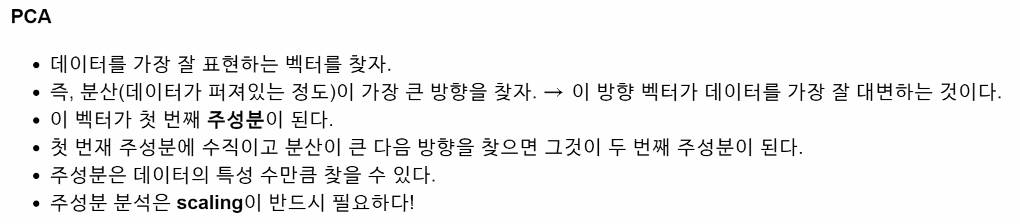

In [165]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # 차원 축소

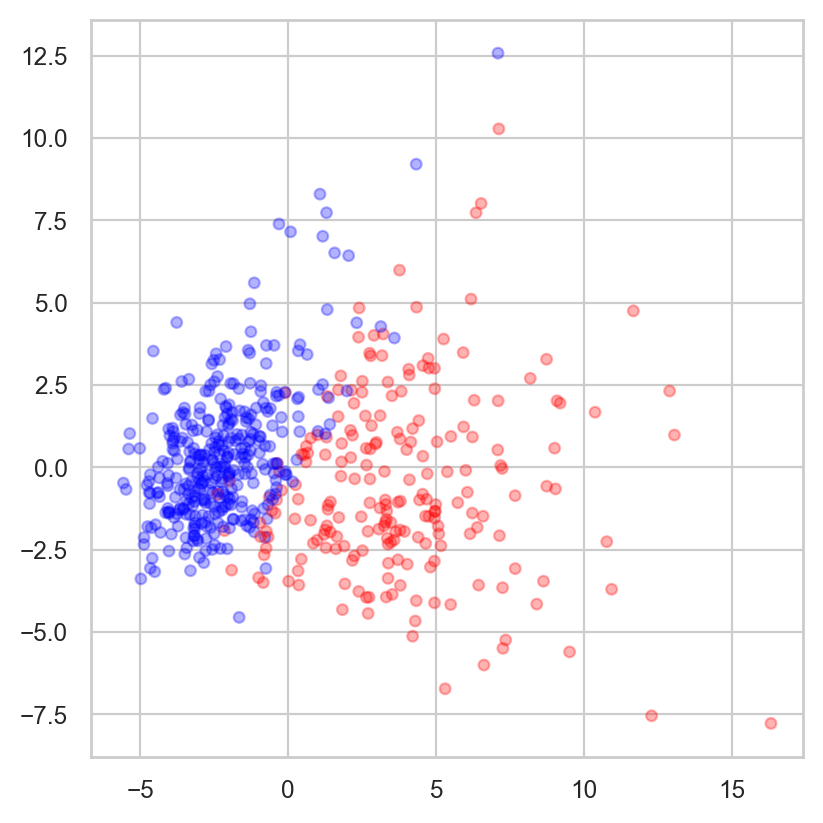

In [166]:
cansor = load_breast_cancer()
cansor_df = pd.DataFrame(data = cansor["data"], columns=cansor["feature_names"])

# 가장 빨리 확인하는 방법이 PCA 이다
cansor_df["label"] = cansor["target"]

# sacaling ------
model_std = StandardScaler()
cansor_scaled = model_std.fit_transform(cansor_df[cansor_df.columns[:-1]])
cansor_scaled_PCA = PCA(n_components=2).fit_transform(cansor_scaled) # 자동으로 찾아준다

colors = {0:"red",1:"blue"}
fig, ax = plt.subplots(figsize=(4,4))
c = cansor_df["label"].replace(colors)
ax.scatter(cansor_scaled_PCA[:,0],
           cansor_scaled_PCA[:,1],
           s=15,
           alpha=0.3,
           color = c);
# 그래프를 보면 경계선이 분명하다 : 머신러닝모델에 넣었을때 성능이 좋다.


## digit 데이터


In [167]:
np.abs(np.random.random(3))

array([0.76971684, 0.38515315, 0.28311649])

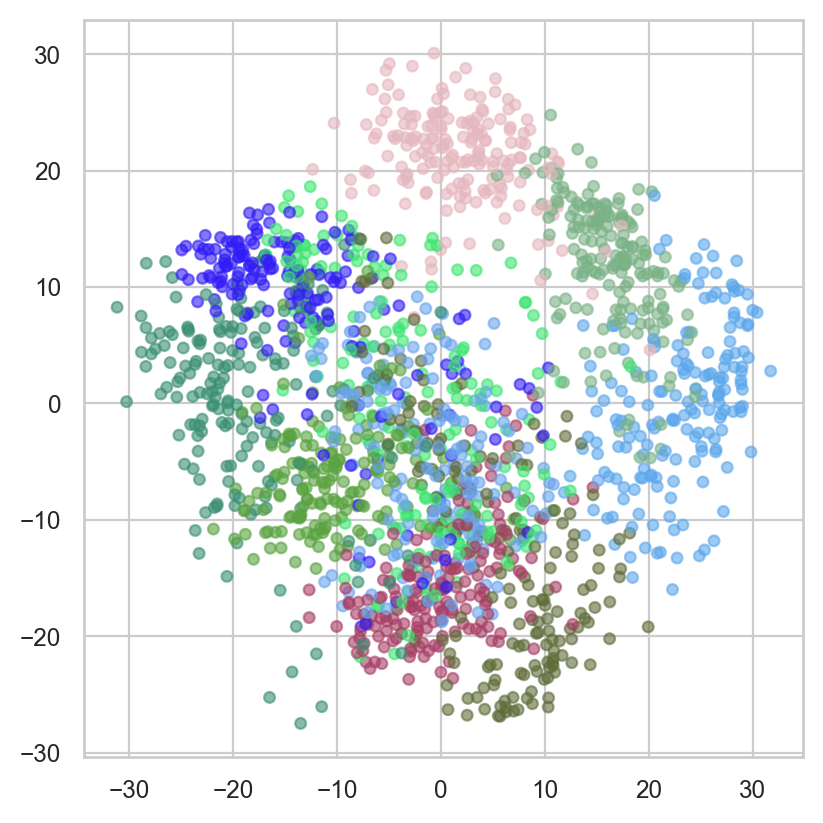

In [168]:
digits = load_digits()
digits_df = pd.DataFrame(data=digits["data"], columns=digits["feature_names"])

digits_df
digit_pca = PCA(n_components=2).fit_transform(digits["data"])
fig, ax = plt.subplots(figsize=(4,4))

dict_color = {}

for i in range(10):
    dict_color[i] = np.abs(np.random.random(3))
color_mapping = [dict_color[i] for i in digits["target"]]

ax.scatter(digit_pca[:,0],
           digit_pca[:,1],
           s=15,
           c=color_mapping,
           alpha=0.6);  # 주석 해제하여 색상 지정

## HR 데이터를 시각화하기

In [169]:
df = pd.read_csv("../datas/240524/hr_data_preprocessing.csv",index_col=0)
df.head(1)

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,...,birth_year,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single
0,1980-07-20,2013,sales,single,2,3,8.33,9431500,8923739,8.0,...,1980,42,9,5.690003,0,0,1,0,0,1


#### 시각화

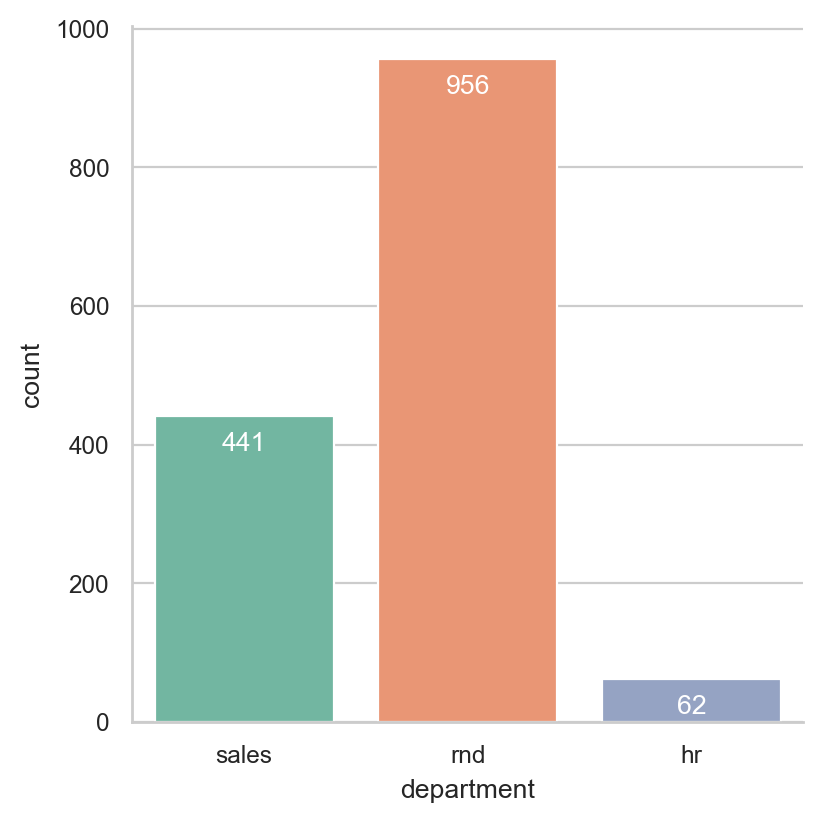

In [170]:
fig, ax = plt.subplots(figsize=(4,4))
sns.countplot(data=df,
              x="department");

ax.spines[["top","right"]].set_visible(False)

dep_dict = dict(df["department"].value_counts())

for p, k in zip(ax.patches, sorted(dep_dict, reverse=True)):
    x = p.get_x() + p.get_width()/2
    y = p.get_height() - 40
    ax.annotate(dep_dict[k], (x,y), ha="center", va="center", color = "white")

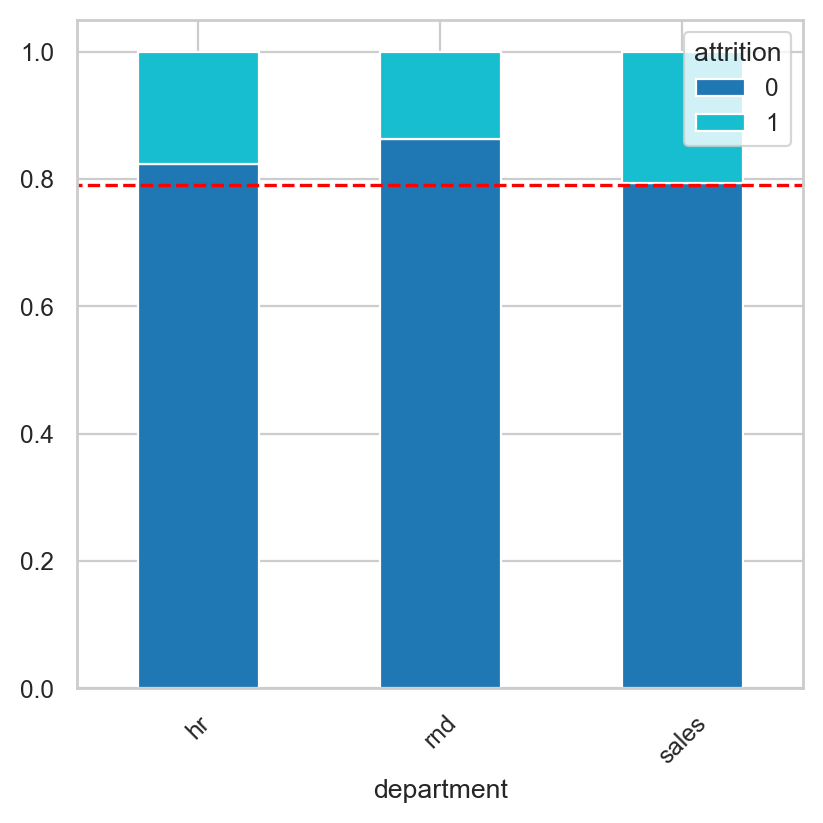

In [171]:
for_bar = pd.crosstab(df["department"],
                      df["attrition"],
                      normalize="index")


fig, ax = plt.subplots(figsize=(4,4))
for_bar.plot(kind="bar",
             stacked=True,
             rot=45,
             ax=ax,
             colormap="tab10");

ax.plot([-2,5],[0.79,0.79], color="red", ls="--");

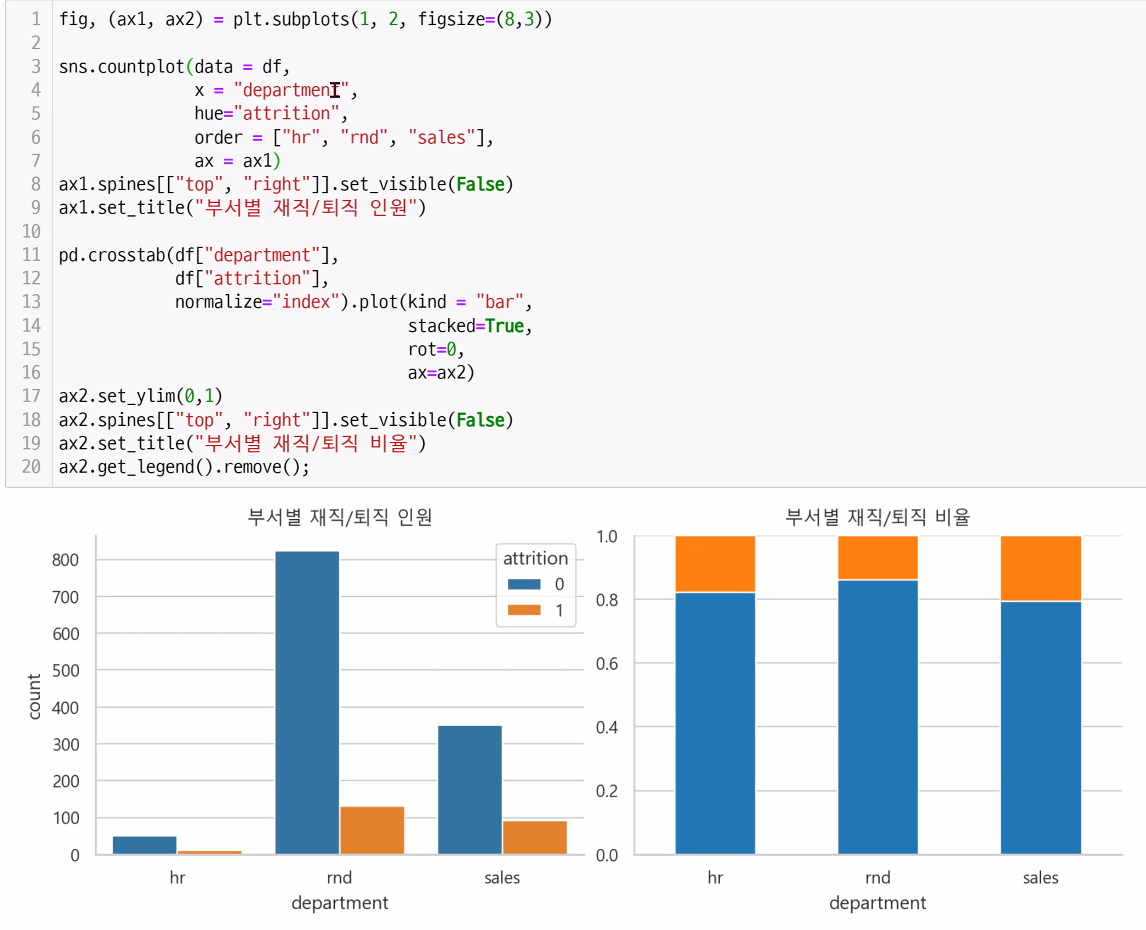

In [172]:
# 부서별 분류
df.groupby(["department"])["salary"].mean()

department
hr       6.252758e+06
rnd      6.162250e+06
sales    6.088190e+06
Name: salary, dtype: float64

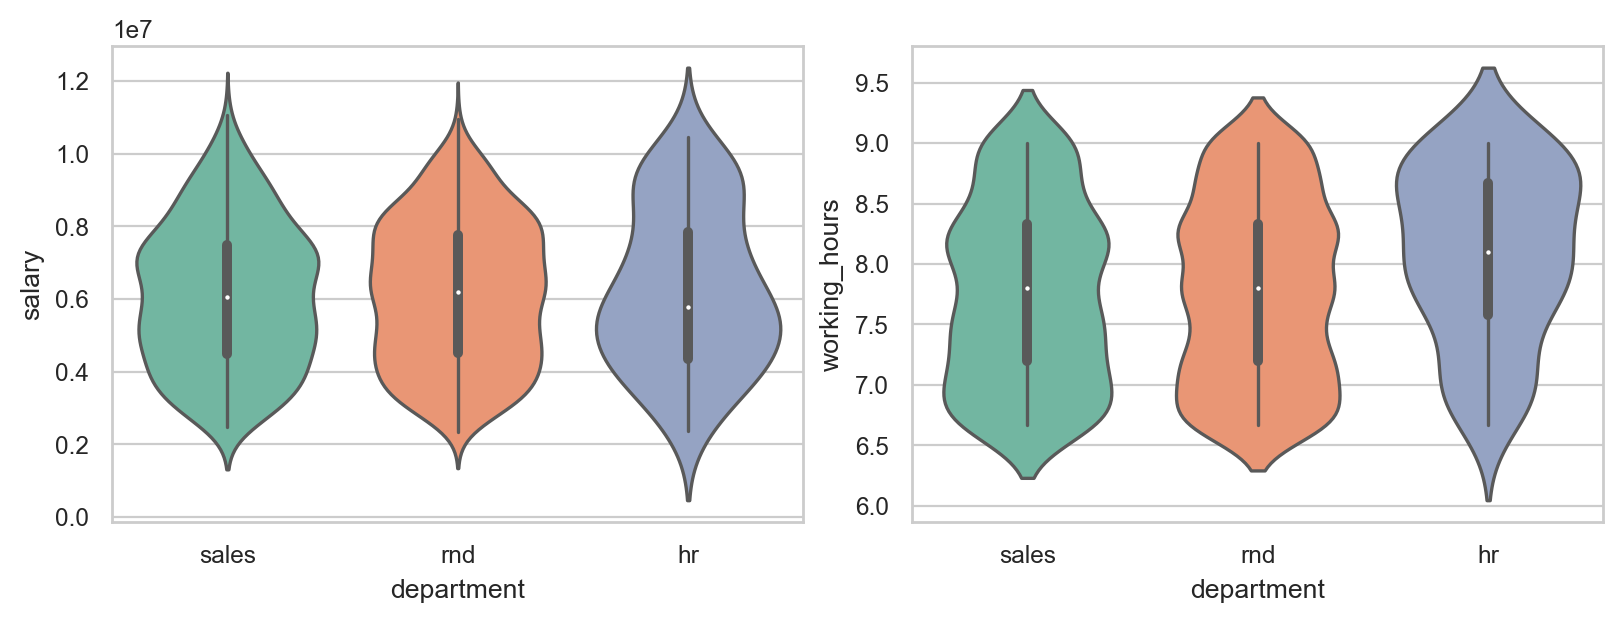

In [173]:
fig, ax = plt.subplots(1,2,figsize=(8,3))

sns.violinplot(data=df, x="department",y="salary",ax=ax[0])
sns.violinplot(data=df, x="department",y="working_hours",ax=ax[1]);

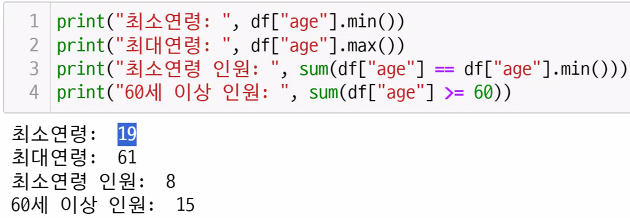

In [174]:
def age_categorize(age):
    if 19 <= age < 30:
        age = 20
    elif 30 <= age < 50:
        age = (age//10)*10
    else:
        age = 50
    return age

In [175]:
df["age_categorize"] = df["age"].apply(age_categorize).astype("category")

df["age_categorize"].value_counts()

30    643
40    364
20    256
50    196
Name: age_categorize, dtype: int64

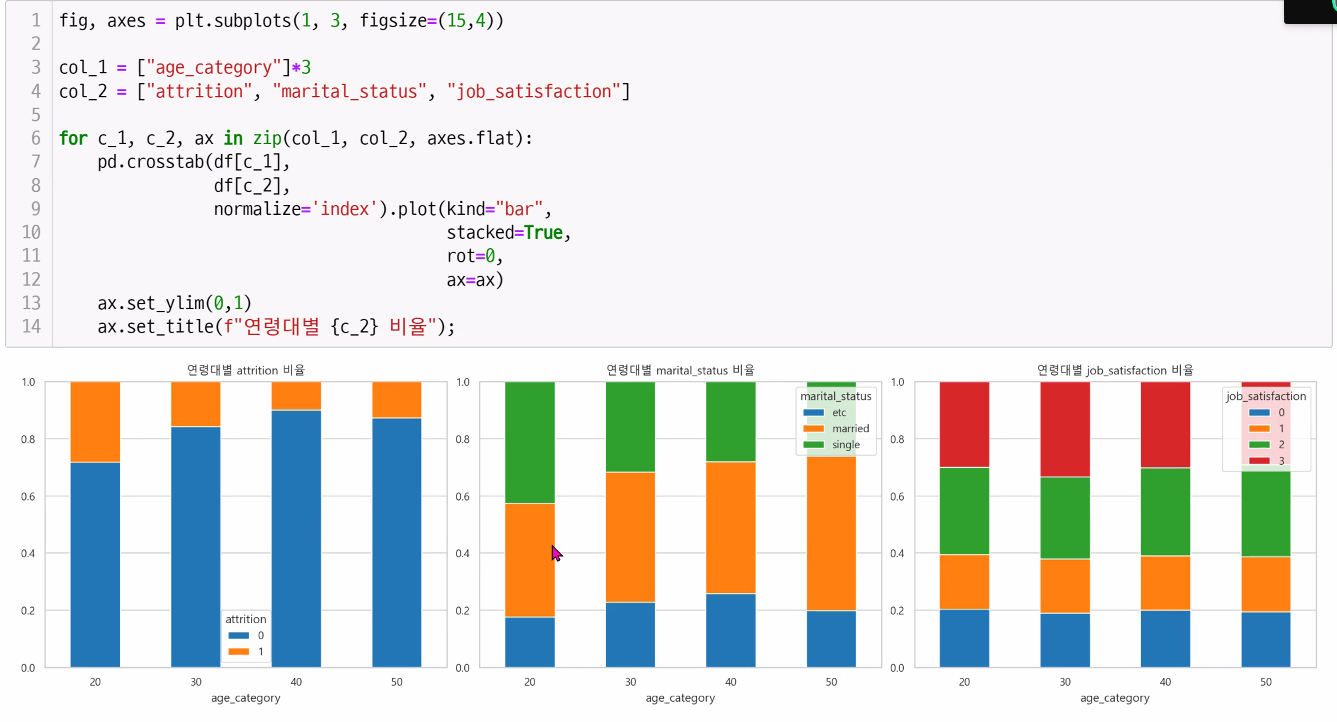

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [177]:
df = pd.read_csv("../datas/240524/hr_data_preprocessing.csv",index_col=0)

### 1 . corr

In [178]:
df.columns

Index(['birthday', 'entry_year', 'department', 'marital_status',
       'performance_rating', 'job_satisfaction', 'working_hours', 'salary',
       'last_year_salary', 'num_companies_worked', 'attrition', 'birth_year',
       'age', 'years_at_company', 'salary_increasing_rate', 'department_hr',
       'department_rnd', 'department_sales', 'marital_status_etc',
       'marital_status_married', 'marital_status_single'],
      dtype='object')

<AxesSubplot: >

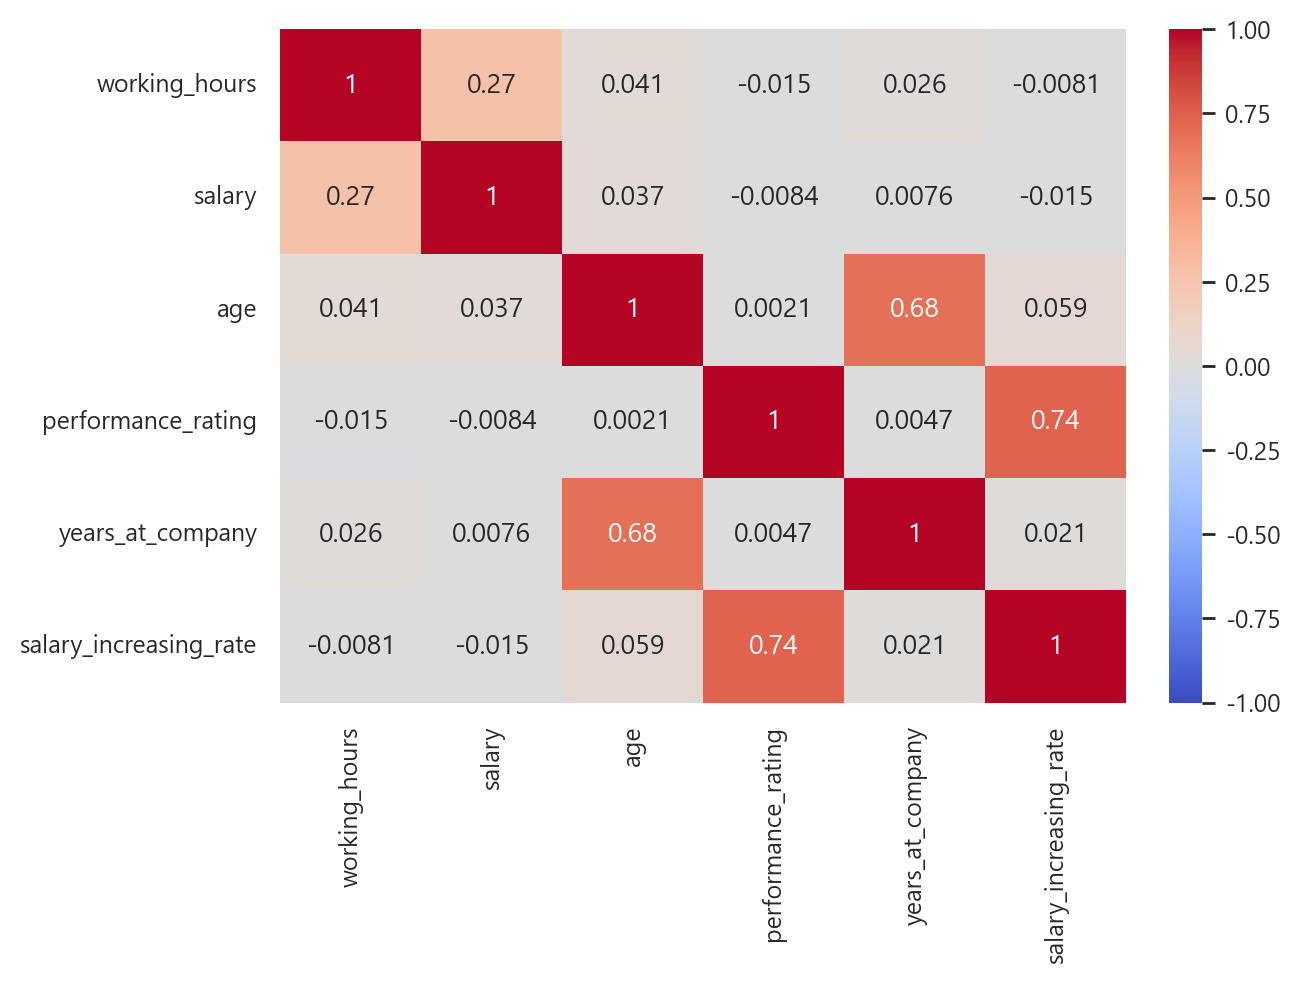

In [179]:
num_col = ["working_hours",
            "salary",
            "age",
            # "num_companies_worked",   # ordianl 은 스피어만으로 해야함
            # "job_satisfaction",       # ordianl 은 스피어만으로 해야함
            "performance_rating",
            "years_at_company",
            "salary_increasing_rate"]

cor_data = df[num_col].corr()
# df[num_col].corr().plot(kind="heatmap")
sns.heatmap(cor_data,
            annot=True,
            vmax=1,vmin=-1,
            cmap='coolwarm',
            )


<AxesSubplot: >

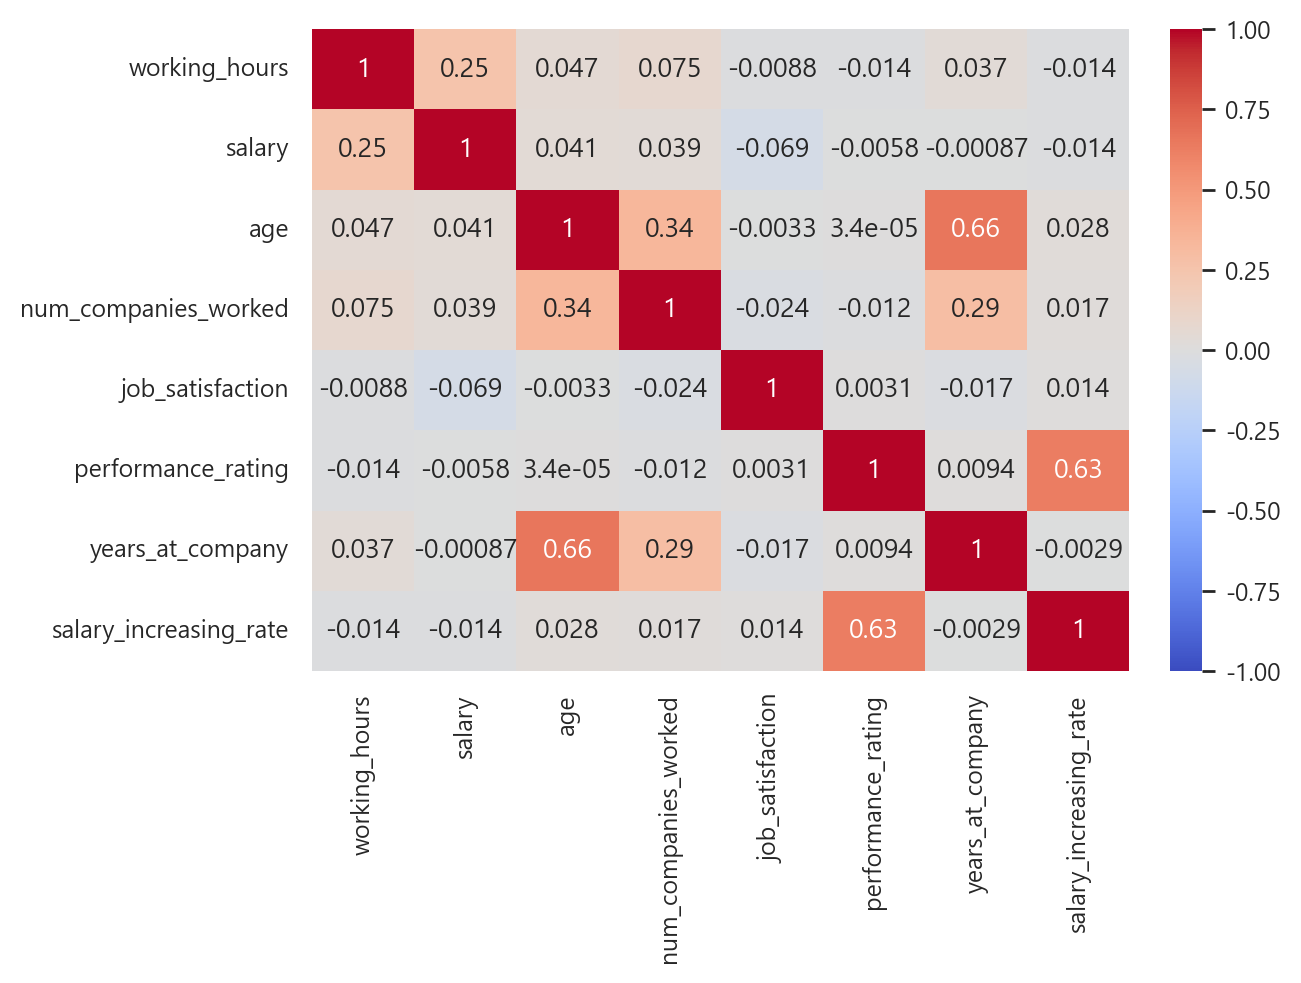

In [180]:
num_col = ["working_hours",
            "salary",
            "age",
            "num_companies_worked",   # ordianl 은 스피어만으로 해야함
            "job_satisfaction",       # ordianl 은 스피어만으로 해야함
            "performance_rating",
            "years_at_company",
            "salary_increasing_rate"]

cor_data = df[num_col].corr(method="spearman")
# df[num_col].corr().plot(kind="heatmap")
sns.heatmap(cor_data,
            annot=True,
            vmax=1,vmin=-1,
            cmap='coolwarm',
            )


In [181]:
df.columns

Index(['birthday', 'entry_year', 'department', 'marital_status',
       'performance_rating', 'job_satisfaction', 'working_hours', 'salary',
       'last_year_salary', 'num_companies_worked', 'attrition', 'birth_year',
       'age', 'years_at_company', 'salary_increasing_rate', 'department_hr',
       'department_rnd', 'department_sales', 'marital_status_etc',
       'marital_status_married', 'marital_status_single'],
      dtype='object')

In [182]:
for_fit = ["working_hours",
            "salary",
            "age",
            "num_companies_worked",
            "salary_increasing_rate",
            "department_hr", 
            "department_rnd", 
            "department_sales",
            "marital_status_etc", 
            "marital_status_married", 
            "marital_status_single"
            ]

X = df[for_fit]
y = df["attrition"]

x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                        test_size=0.25,
                                                        random_state=42,
                                                        stratify=y) # 이값은 y 데이터의 라벨이 비대칭일때

In [183]:
print("비율 비교 전체",y.sum()/len(y))
print("비율 비교 훈련",y_test.sum()/len(y_test))

비율 비교 전체 0.16038382453735436
비율 비교 훈련 0.16164383561643836


In [184]:
train_indx = x_train.index
test_indx = x_test.index

In [185]:
minmax_model = MinMaxScaler()
x_train = minmax_model.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train, columns=for_fit, index=train_indx)

In [186]:
x_test =minmax_model.transform(x_test)
x_test_scaled = pd.DataFrame(x_test, columns=for_fit, index=test_indx)

In [187]:
train = x_train_scaled.merge(y_train, left_index=True, right_index=True)
test = x_test_scaled.merge(y_test, left_index=True, right_index=True)

In [188]:
train.to_csv("../datas/240524/hr_data_preprocessing_train.csv")
test.to_csv("../datas/240524/hr_data_preprocessing_test.csv")